In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
df_multi_df_list_p = {}
df_multi_df_list_n = {}
graph_file = "graph/ece_real_02_eye.json"
for m in range(0,11):
    ignore_events_threshold = m*0.2
    df_list_p = []
    df_list_n = []
    for i in range(1,26):
        # Read the CSV file into a DataFrame
#         file_path = '../thesis_data/arne_03_05/logs_arne_real_03_05_tt1/log'+str(i)+'.txt'
#         file_path = '../thesis_data/arne_03_05/logs_arne_imag_03_05_tt3/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_real_01/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_real_02/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_imag_01/log'+str(i)+'.txt'
#         file_path = '../thesis_data/ly_04_07/logs_ly_imag_03/log'+str(i)+'.txt'
        file_path = '../thesis_data/ece_04_07/logs_ece_real_02/log'+str(i)+'.txt'

        
        df = pd.read_csv(file_path, sep='\t')

        # Column to check for changes
        column_to_check = 'Gazing'

        # Filter rows where the column value changes
        df_filtered = df[df[column_to_check] != df[column_to_check].shift()].copy()

        print("\nFiltered DataFrame:")
        print(df_filtered)
        def is_integer_trial(row):
            try:
                int_value = int(row['Trial'])
                return True
            except ValueError:
                return False

        df_filtered['gazing_time'] = df_filtered['Time'].shift(-1) - df_filtered['Time']
        df_filtered_2 = df_filtered[df_filtered.apply(lambda row: is_integer_trial(row),axis=1)].copy()
        df_filtered_3 = df_filtered_2[df_filtered_2['Gazing']!='0'].copy()
        df_filtered_final_p = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])>=ignore_events_threshold,axis=1)].copy()
        df_filtered_final_n = df_filtered_3[df_filtered_3.apply(lambda row: float(row['gazing_time'])<ignore_events_threshold,axis=1)].copy()


        df_list_p.append(df_filtered_final_p)
        df_list_n.append(df_filtered_final_n)
        
    df_multi_df_list_p[str(ignore_events_threshold)]=df_list_p
    df_multi_df_list_n[str(ignore_events_threshold)]=df_list_n



Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    116.063384                   xx                   xx    xx     xx     xx
1    116.162074  -285.01224517822266     368.065764605999     1     12      0
16   117.242668  -384.84744930267334   253.36159014701843     1     12      2
20   117.510615  -413.12974405288696    191.5781481564045     1     12      0
21   117.575786   -410.8953137397766    151.4977886080742     1     12      2
32   118.303413    -183.501314163208   186.62469363212585     1     12      0
37   118.653460    -97.0045280456543   187.69723257422447     1     12     11
41   118.925005    -40.3075590133667   -12.07775303721428     1     12      9
45   119.206601   123.57821846008301  -206.87612915039062     1     12      0
47   119.344548   106.67781257629395  -247.76951265335083     1     12      6
54   119.815499   -142.6488904953003   -314.9603934288025     1     12      0
55   119.884828  -202.49323081970215  -318.


Filtered DataFrame:
           Time                GazeX                GazeY Trial Target Gazing
0    299.797600                   xx                   xx    xx     xx     xx
1    299.805008  -16.242769718170166    337.4289432540536    22      4      0
7    300.276349    52.02840614318848   198.63921828567982    22      4      6
9    300.443146   127.47148132324219    158.2246726602316    22      4      0
11   300.582109   231.35656356811523   138.78084008395672    22      4      7
15   300.848183    428.8025093078613    83.35058552026749    22      4      0
17   300.985394    596.4790363311768   128.73273485898972    22      4     16
21   301.256218    479.5956859588623    7.264767676591873    22      4      0
22   301.328679   409.95691108703613  -46.723427921533585    22      4     13
27   301.691407      126.49893450737  -218.81933856010437    22      4      0
28   301.762125    7.821971654891968  -244.86704921722412    22      4     12
30   301.897179   -168.2876501083374   -260


Filtered DataFrame:
          Time               GazeX               GazeY Trial Target Gazing
0   140.344818                  xx                  xx    xx     xx     xx
1   140.575607   55.18300151824951  332.03156496584415     3      2      0
20  141.949833  194.31823253631592  245.03124949336052     3      2      7
24  142.212822   437.6996841430664   84.42609125375748     3      2      0
25  142.280921  495.37668228149414   42.25749921798706     3      2      9
26  142.347261     538.53369140625  1.7686478197574615     3      2      2
53  144.436793                  yy                  yy    yy     yy     yy
54  144.950279                  zz                  zz    zz     zz     zz

Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   147.023973                   xx                   xx    xx     xx     xx
1   147.029093   -91.87673091888428    347.8289522230625     4     13      0
14  147.928888   57.252370834350586   225.6140695586


Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   319.220272                   xx                   xx    xx     xx     xx
1   319.273041   -96.58995723724365    301.3015095591545    24      3      0
11  319.952174    88.38985061645508    239.8352342247963    24      3      5
19  320.564354  -118.02263975143433    90.92892361432314    24      3      0
21  320.727251  -254.73194646835327    46.65090025216341    24      3      9
22  320.805528  -334.05792331695557   17.435235746204853    24      3      0
23  320.876394    -383.670382976532  -12.272420458495617    24      3     14
24  320.946855   -439.2553882598877   -35.55130123347044    24      3      0
26  321.085948  -493.26927423477173  -108.85049870610237    24      3      3
52  323.328313  -480.96812295913696  -127.86304414272308    24      3      0
63  324.111843   -494.9192461967468  -110.95925009250641    24      3      3
93  326.193040                   yy                   y


Filtered DataFrame:
          Time               GazeX               GazeY Trial Target Gazing
0   140.344818                  xx                  xx    xx     xx     xx
1   140.575607   55.18300151824951  332.03156496584415     3      2      0
20  141.949833  194.31823253631592  245.03124949336052     3      2      7
24  142.212822   437.6996841430664   84.42609125375748     3      2      0
25  142.280921  495.37668228149414   42.25749921798706     3      2      9
26  142.347261     538.53369140625  1.7686478197574615     3      2      2
53  144.436793                  yy                  yy    yy     yy     yy
54  144.950279                  zz                  zz    zz     zz     zz

Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   147.023973                   xx                   xx    xx     xx     xx
1   147.029093   -91.87673091888428    347.8289522230625     4     13      0
14  147.928888   57.252370834350586   225.6140695586


Filtered DataFrame:
          Time                GazeX                GazeY Trial Target Gazing
0   162.720631                   xx                   xx    xx     xx     xx
1   162.728087    66.34452724456787    297.8170223236084     6     15      0
14  163.638420   197.26881408691406   175.85045233368874     6     15      6
25  164.377263    366.4906482696533    9.817395150661469     6     15      8
29  164.660671   270.02153491973877  -212.81964147090912     6     15      0
31  164.801099     92.7068338394165   -256.8990966081619     6     15      7
33  164.950770  -140.07777428627014  -302.69229340553284     6     15      0
34  165.029348   -219.1093933582306   -280.1011723279953     6     15      3
37  165.249744  -434.79163813591003  -215.71634835004807     6     15      0
40  165.457799  -511.29704546928406  -101.83469688892365     6     15     15
71  167.581756                   yy                   yy    yy     yy     yy
72  168.095521                   zz                   z

In [3]:
def print_object_attributes(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f"{key}: {value}")
    else:
        for attr in dir(obj):
            if not attr.startswith('__') and not attr.endswith('__'):
                value = getattr(obj, attr)
                print(f"{attr}: {value}")

print_object_attributes(df_multi_df_list_p)

0.0: [           Time                GazeX                GazeY Trial Target Gazing  \
16   117.242668  -384.84744930267334   253.36159014701843     1     12      2   
21   117.575786   -410.8953137397766    151.4977886080742     1     12      2   
37   118.653460    -97.0045280456543   187.69723257422447     1     12     11   
41   118.925005    -40.3075590133667   -12.07775303721428     1     12      9   
47   119.344548   106.67781257629395  -247.76951265335083     1     12      6   
55   119.884828  -202.49323081970215  -318.76963770389557     1     12     12   
90   122.513404   -92.68347358703613  -15.244228720664978     1     12      9   
92   122.654462   -27.26890468597412    42.93719740211964     1     12     11   
98   123.070065  -54.062644958496094  -14.924672618508339     1     12      9   
111  124.205043    -67.3308334350586   -283.1928119659424     1     12      6   
122  125.259911  -188.05596542358398  -283.93384194374084     1     12     12   

     gazing_time  
16

1.0: [           Time                GazeX                GazeY Trial Target Gazing  \
55   119.884828  -202.49323081970215  -318.76963770389557     1     12     12   
98   123.070065  -54.062644958496094  -14.924672618508339     1     12      9   
122  125.259911  -188.05596542358398  -283.93384194374084     1     12     12   

     gazing_time  
55      1.891535  
98      1.134978  
122     2.256088  ,           Time              GazeX                GazeY Trial Target Gazing  \
36  132.503706  566.2351627349854  -12.618751913309097     2      2      2   
75  135.338971  527.9328117370605   -83.79866999387741     2      2      2   

    gazing_time  
36     2.021271  
75     2.122251  ,           Time            GazeX               GazeY Trial Target Gazing  \
26  142.347261  538.53369140625  1.7686478197574615     3      2      2   

    gazing_time  
26     2.089531  ,           Time              GazeX              GazeY Trial Target Gazing  \
46  150.180876  536.2414226531982  75.

In [4]:
def count_p(df_list_p):
    count_true_positive = 0
    count_false_positive = 0
    for df in df_list_p:
        c_tp = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        c_fp = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        count_true_positive+= c_tp
        count_false_positive+= c_fp
    return count_true_positive,count_false_positive

def count_n(df_list_n):
    count_true_negative = 0
    count_false_negative = 0
    for df in df_list_n:
        c_tn = len(df[df.apply(lambda row: float(row['Target'])!=float(row['Gazing']),axis=1)])
        c_fn = len(df[df.apply(lambda row: float(row['Target'])==float(row['Gazing']),axis=1)])
        count_true_negative+= c_tn
        count_false_negative+= c_fn
    return count_true_negative,count_false_negative

data_for_graph = {
    "Dwelltime":[],
    "count_true_positive":[],
    "count_false_positive":[],
    "count_true_negative":[],
    "count_false_negative":[]
    
}
for m in range(0,11):
    ignore_events_threshold = m*0.2
    count_true_positive,count_false_positive = count_p(df_multi_df_list_p[str(ignore_events_threshold)])
    count_true_negative,count_false_negative = count_n(df_multi_df_list_n[str(ignore_events_threshold)])
    data_for_graph["Dwelltime"].append(str(round(ignore_events_threshold,2)))
    if(count_true_positive==0):
        data_for_graph["count_true_positive"].append(0)
    else:
        data_for_graph["count_true_positive"].append((count_true_positive/(count_true_positive+count_false_positive))*100)
    if(count_false_positive==0):
        data_for_graph["count_false_positive"].append(0)
    else:
        data_for_graph["count_false_positive"].append((count_false_positive/(count_true_positive+count_false_positive))*100)
    if(count_true_negative==0):
        data_for_graph["count_true_negative"].append(0)
    else:
        data_for_graph["count_true_negative"].append((count_true_negative/(count_true_negative+count_false_negative))*100)
    if(count_false_negative==0):
        data_for_graph["count_false_negative"].append(0)
    else:
        data_for_graph["count_false_negative"].append((count_false_negative/(count_true_negative+count_false_negative))*100)
    




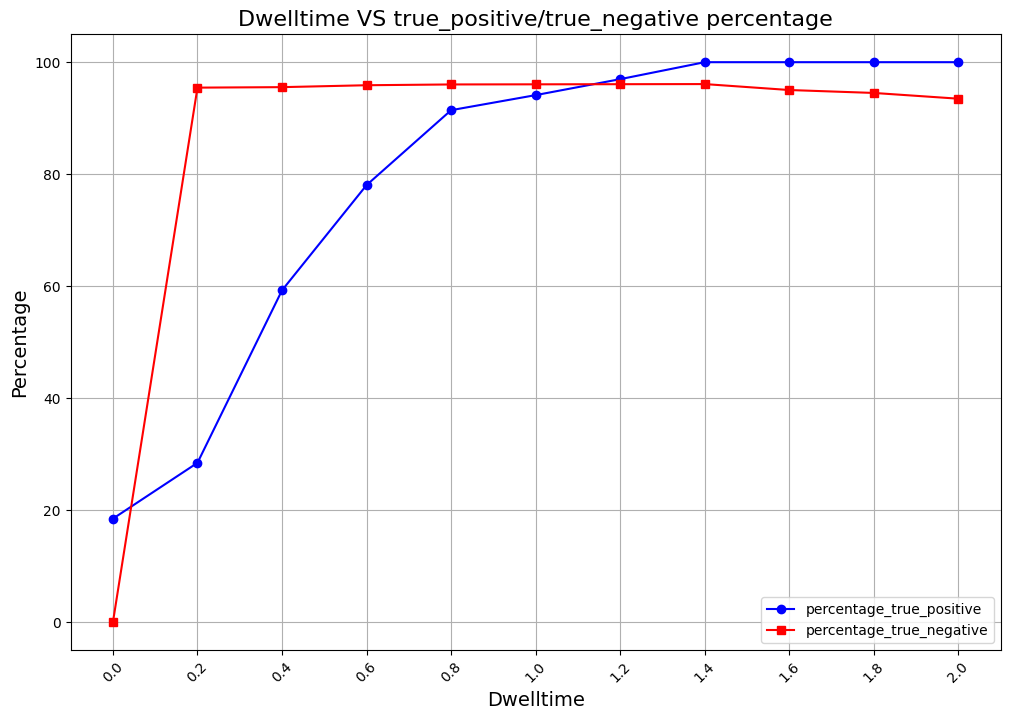

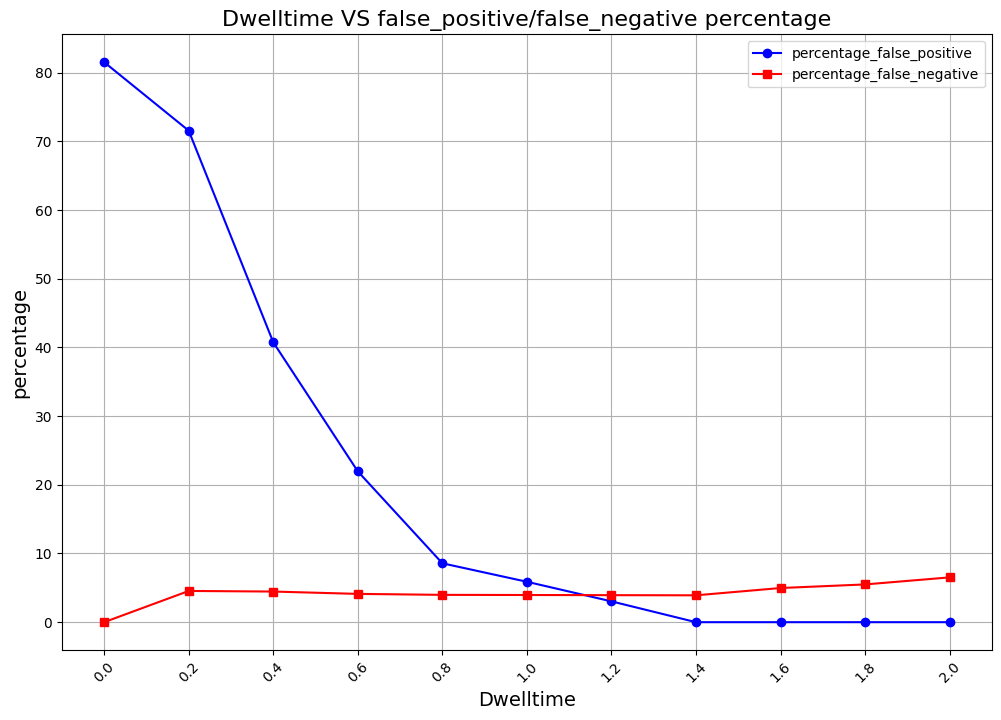

In [5]:
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_positive"], marker='o', linestyle='-', color='b', label='percentage_true_positive')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_true_negative"], marker='s', linestyle='-', color='r', label='percentage_true_negative')

# Adding titles and labels
plt.title('Dwelltime VS true_positive/true_negative percentage', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_positive"], marker='o', linestyle='-', color='b', label='percentage_false_positive')
plt.plot(data_for_graph["Dwelltime"], data_for_graph["count_false_negative"], marker='s', linestyle='-', color='r', label='percentage_false_negative')

# Adding titles and labels
plt.title('Dwelltime VS false_positive/false_negative percentage', fontsize=16)
plt.xlabel('Dwelltime', fontsize=14)
plt.ylabel('percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the chart
plt.show()

In [6]:
# Specify the file name
file_name = 'eye_data_for_graph.json'

# Save the dictionary to a file
with open(file_name, 'w') as file:
    json.dump(data_for_graph, file)
    
# Save the dictionary to a file
with open(graph_file, 'w') as file:
    json.dump(data_for_graph, file)